# Machine Learning 1 - Nearest Neighbors and Decision Trees

In this lab, as in the next two, we will explore different classification methods, and how we can compare their results. For those three labs, we will use a simplified version of the **[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) object recognition dataset**. 

This lab will use **decision trees** and **random forest** methods. In Lab 6, we will use neural networks, and in Lab 7 Support Vector Machines.

## Important note

For this lab and the next two, **each student must write a report** (one report for the three labs together) which will be used during the oral exam. This report should highlight the different methods used during the labs, but also how you validated each method and compared their results.

## Lab objectives

* Classification with decision trees and random forests.
* Cross-validation and evaluation.

## Introduction to the dataset

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset has been collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. It consists of 60.000 32x32 colour images, split in 10 classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.

*Reference: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.* PDF available at https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

For the purpose of the INFO-H-501 laboratories, we will use a subset of those images by only taking 3 different classes: 'airplane', 'bird' and 'horse'.

The modified dataset can be downloaded here: https://www.dropbox.com/s/b0mr9o21613npd2/CIFAR10.zip?dl=1.

The images are 32x32 8-bit **RGB**, and from these we extracted **Histogram of Gradient** vectors (16 orientations x 16 blocks = 256 values in HoG vector).

The following code pre-loads all of this data:

In [1]:
from lab_tools import CIFAR10, evaluate_classifier, get_hog_image

## Examples from the dataset

Pre-loading training data
Pre-loading test data


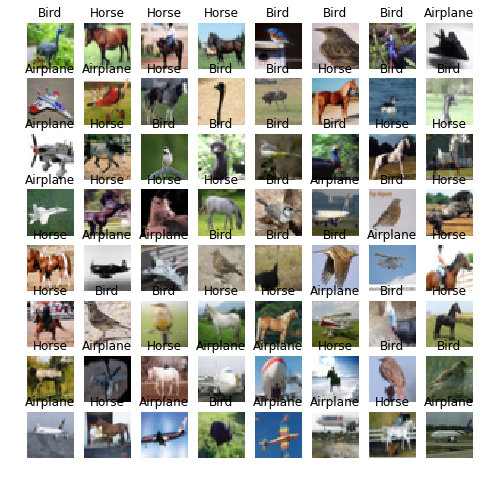

In [3]:
dataset = CIFAR10('./CIFAR10')
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(dataset.train['images'][i].reshape((32,32,3)), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

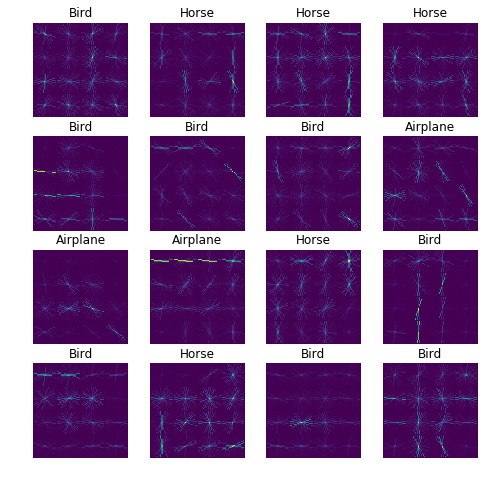

In [4]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    hog = dataset.train['hog'][i].reshape((4,4,16))
    plt.imshow(get_hog_image(hog, 128), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

# 1. Nearest Neighbor

The following example uses the Nearest Neighbor algorithm on the Histogram of Gradient decriptors in the dataset.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit( dataset.train['hog'], dataset.train['labels'] )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [6]:
# Evaluate Training error (=descriptive) :
accuracy, conf_mat = evaluate_classifier(clf, dataset.train['hog'], dataset.train['labels'])

In [7]:
print("Training accuracy: %.2f %%"%accuracy)
print("Confusion matrix:")
print(conf_mat)

Training accuracy: 100.00 %
Confusion matrix:
[[5000    0    0]
 [   0 5000    0]
 [   0    0 5000]]


In [8]:
# Evaluate Test error (=predictive) :
accuracy, conf_mat = evaluate_classifier(clf, dataset.test['hog'], dataset.test['labels'])

In [9]:
print("Test accuracy: %.2f %%"%accuracy)
print("Confusion matrix:")
print(conf_mat)

Test accuracy: 69.40 %
Confusion matrix:
[[609  63  26]
 [258 754 255]
 [133 183 719]]


Explain those results. **What could improve the performances of this classifier ?**

You do not need to code anything for this classifier.

## 2. Decision Trees

[Decision Trees](http://scikit-learn.org/stable/modules/tree.html#tree) classify the data by splitting the feature space according to simple, single-feature rules. Scikit-learn uses the [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29) algorithm for [its implementation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of the classifier. 

* **Create a simple Decision Tree classifier** using scikit-learn and train it on the HoG training set.
* Evaluate the performance of the classifier on the test dataset.
* Build a **full classification pipeline** to find the best parameters for this classifier with **[cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)**.

In [10]:
from sklearn import tree

# --- Your code here --- #


In [11]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(5)

for train,test in kf.split(dataset.train['hog'], dataset.train['labels']):
    train_x = dataset.train['hog'][train]
    train_y = dataset.train['labels'][train]
    print(train_x.shape, train_y.shape)
    
    test_x = dataset.train['hog'][test]
    test_y = dataset.train['labels'][test]
    print(test_x.shape, test_y.shape)

(12000, 256) (12000,)
(3000, 256) (3000,)
(12000, 256) (12000,)
(3000, 256) (3000,)
(12000, 256) (12000,)
(3000, 256) (3000,)
(12000, 256) (12000,)
(3000, 256) (3000,)
(12000, 256) (12000,)
(3000, 256) (3000,)


**Evaluate your best classifier** on the test set. How can you compare it to the classifier with default parameters ?

In [12]:

# --- Your code here --- #


## 3. Random Forests

[Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifiers use multiple decision trees trained on "weaker" datasets (less data and/or less features), averaging the results so as to reduce over-fitting.

* Use scikit-learn to **create a Random Forest classifier** on the CIFAR data. 
* **Use cross-validation to test different parameters**
* **Evaluate your best classifier on the test set**. 
* Compare the results with the previous classifiers.

In [13]:
from sklearn import ensemble

# --- Your code here --- #
